# WGU D207 TASK 1 REV 3 - MATTINSON

<p>Student: Mike Mattinson</p>
<p>Student ID: 001980761</p>
<p>Class: D207 Exploritory Data Analysis</p>
<p>School: Western Goverenor's University</p>
<p>Date: Jun 1, 2021</p>

## Abstract

Short description of the assessment.

## Table of Contents

## List of Tables

## List of Figures

## Imports/Dataframe

In [1]:
# import appropriate packages
import numpy as np # (NUM21)
import pandas as pd # (PAN21)
import matplotlib.pyplot as plt # (MAT21)
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
import scipy.stats as stats # (SCI21)
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from IPython.display import Latex

In [109]:
# create dataframe
df = pd.read_csv('data\churn_clean.csv')
df[['Customer_id','City','Churn']].head(4)

,Customer_id,City,Churn
0,K409198,Point Baker,No
1,S120509,West Branch,Yes
2,K191035,Yamhill,No
3,D90850,Del Mar,No


<P class="mytable" data-title="Initial Clean Dataframe" data-summary="Use pandas to create dataframe from CHURN_CLEAN_CSV file. The file has 10,000 rows with 50 attributes. This table is showing a subset of the total dataframe, showing two attributes (Customer_id, City and Churn) and only the first 4 rows of data.">

## Custom Styles

In [3]:
# use custom css to style notebook (STO21)
from IPython.core.display import HTML
def css_styling(f):
    styles = open( f, "r").read()
    print('{} custom styles applied'.format( f ))
    return HTML(styles)
css_styling( 'styles\\custom_2.css' )

styles\custom_2.css custom styles applied


In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}

## Organizational Problem Statement

Help organization determine which variables from the data are related to the target variable of 'Churn'.

## Univariate Statistics

show distribution of numerical variables


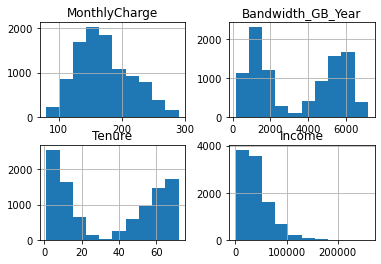

In [33]:
# show distribution for two numeric variables
df[['MonthlyCharge', 'Bandwidth_GB_Year','Tenure','Income']].hist()
print('show distribution of numerical variables')

show distribution of categorical variables


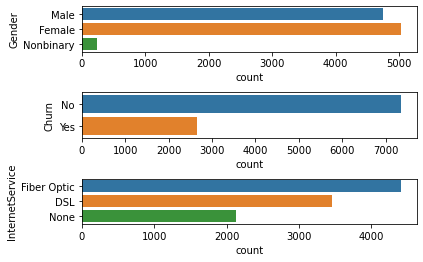

In [84]:
# show distribution of two categorical variables
# https://stackoverflow.com/questions/61000529/multiple-count-plots-in-seaborn
fig, ax = plt.subplots(3,1)
plt.subplots_adjust(hspace=0.9)
sns.countplot(y='Gender', data=df, ax=ax[0])
sns.countplot(y='Churn', data=df, ax=ax[1])
sns.countplot(y='InternetService', data=df, ax=ax[2])
print('show distribution of categorical variables')

## Bivariate Statistics 

### Churn/MonthlyCharge

First plot is a histogram with target overlayed. The target is the categorical variable 'Churn'. The predicator is the numeric value 'MonthlyCharge'. The numeric values are grouped into 5 bins. Labels and lines are added to help interpret results. 

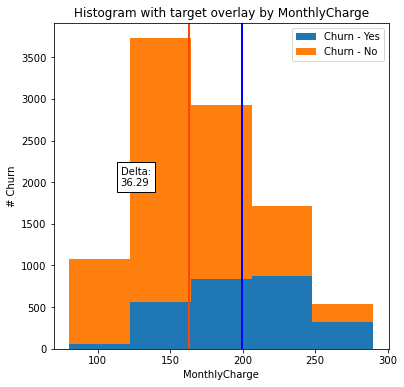

In [7]:
# create histogram with target overlay
predictor = 'MonthlyCharge'
df_yes = df[df.Churn=="Yes"][predictor];
df_no = df[df.Churn=="No"][predictor]
yes_mean = df_yes.mean();
no_mean = df_no.mean(); 
fig,ax = plt.subplots(figsize=(6,6))
ax.hist([df_yes,df_no], bins=5, stacked=True)
ax.legend(['Churn - Yes','Churn - No'])
ymin, ymax = ax.get_ylim();
xmin, xmax = ax.get_xlim()
ax.axvline(yes_mean, color='blue', lw=2) # yes mean
ax.axvline(no_mean, color='orangered', lw=2) # no mean
ax.text((xmax-xmin)/2,
        (ymax-ymin)/2,
        'Delta:\n' + str(round(abs(yes_mean - no_mean),2)),
        bbox={'facecolor':'white'})
plt.title('Histogram with target overlay by ' + str(predictor))
plt.xlabel(predictor); 
plt.ylabel('# Churn');
plt.show();

<P class="myfigure" data-title="Histogram with Target Overlay plotted against the given predictor" data-summary="Vertical lines show the mean values for the two datasets. Notice the difference between groups.">

## Chi-Squared Test

### 1st test - Churn/MonthlyCharge

During the process of cleaning the data and from the bivariate statistics sections above, it should be clear that the numerical value of 'MonthlyCharge' is related to the target variable of 'Churn'. The following section will conduct a chi-squared test to determine if the two variables are dependent. If so, further investigation will be necessary.

<p class ='step' data-inc="1" data-step="Define data and calculate Chi2">

In [57]:
# Chi-square test of independence using the contingency data (CHI21)
mc_groups =pd.cut(df['MonthlyCharge'], bins=5)
contingency= pd.crosstab(df['Churn'], mc_groups) 
stat, p, dof, expected = chi2_contingency(contingency)

<p class ='step' data-inc="2" data-step="Setup hypothosis and level of significance">

Null Hypothesis: $ H_0$: Churn and Monthly Charge are independent

Alternate Hypothesis: $ H_A$: Churn and Monthly Charge are dependent

In [58]:
alpha = .001 # level of significance

<p class ='step' data-inc="3" data-step="Select test statistic">

Chi-squared: \begin{equation}
{\chi}^2=
\sum{
    \frac{
        {\left( 
            {O}-{E}
        \right)}^2
        }
        {E}
}
\end{equation}

<p class ='step' data-inc="4" data-step="Setup test criteria">

In [59]:
# dof = degrees of freedome = (rows-1)(cols-1)
prob = 1 - alpha # significance level

In [108]:
# create a chi-squared distribution table for selected values
chi = pd.DataFrame(1.212, index=[1,2,3,4,5], 
    columns=['0.90','0.95','0.975','0.99','0.999'])
for i in range(1,6):
    chi['0.90'][i] = chi2.ppf(0.90, i)
    chi['0.95'][i] = chi2.ppf(0.95, i)
    chi['0.975'][i] = chi2.ppf(0.975, i)
    chi['0.99'][i] = chi2.ppf(0.99, i)
    chi['0.999'][i] = chi2.ppf(0.999, i)
critical = chi2.ppf(prob, dof)
chi.style.applymap(lambda x: 'background-color : yellow' 
    if x==critical else '')

,0.90,0.95,0.975,0.99,0.999
1,2.705543,3.841459,5.023886,6.634897,10.827566
2,4.605170,5.991465,7.377759,9.210340,13.815511
3,6.251389,7.814728,9.348404,11.344867,16.266236
4,7.779440,9.487729,11.143287,13.276704,18.466827
5,9.236357,11.070498,12.832502,15.086272,20.515006


<P class="mytable" data-title="Upper-tail critical values of chi-squared distribution" data-summary="Table created from scipy.stats chi2 package. Cols are the probability, rows are the degrees of freedom. The critical value is highlighted for reference. (CHI21)">

In [61]:
# Reject Null Hypothesis based on Chi2 critical value
Latex(f"""\\begin{{equation*}}
Reject H_0 \\longleftrightarrow \\chi^2 \\geqslant {{{critical}}}
\\end{{equation*}}
""")

<IPython.core.display.Latex object>

<p class ='step' data-inc="4" data-step="Interpret test results">

In [62]:
# interpret test-statistic
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('stat >= critical, therefore, variables are dependent, reject H0')
else:
    print('stat < critical, therefore, variables are independent, fail to reject H0')

probability=0.999, critical=18.467, stat=1319.582
stat >= critical, therefore, variables are dependent, reject H0


In [63]:
# interpret p-value
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('p <= alpha, therefore, variables are dependent, reject H0')
else:
    print('p > alpha, therefore, variables are independent, fail to reject H0')

significance=0.001, p=0.000
p <= alpha, therefore, variables are dependent, reject H0


<p class ='step' data-inc="5" data-step="Conclusion">

Reject null hypothesis (H0) and conduct further research to determine extent of the dependent relationship between Churn and MonthlyCharge.

### 2nd test - Churn/Tenure

During the process of cleaning the data and from the bivariate statistics sections above, it should be clear that the numerical value of 'Tenure' is related to the target variable of 'Churn'. The following section will conduct a chi-squared test to determine if the two variables are dependent. If so, further investigation will be necessary.

<p class ='step' data-inc="1" data-step="Define data and calculate Chi2">

In [64]:
# Chi-square test of independence using the contingency data (CHI21)
mc_groups =pd.cut(df['Tenure'], bins=5)
contingency= pd.crosstab(df['Churn'], mc_groups) 
stat, p, dof, expected = chi2_contingency(contingency)

<p class ='step' data-inc="2" data-step="Setup hypothosis and level of significance">

Null Hypothesis: $ H_0$: Churn and Tenure are independent

Alternate Hypothesis: $ H_A$: Churn and Tenure are dependent

In [65]:
alpha = .001 # level of significance

<p class ='step' data-inc="3" data-step="Select test statistic">

Chi-squared: \begin{equation}
{\chi}^2=
\sum{
    \frac{
        {\left( 
            {O}-{E}
        \right)}^2
        }
        {E}
}
\end{equation}

<p class ='step' data-inc="4" data-step="Setup test criteria">

In [66]:
# dof = degrees of freedome = (rows-1)(cols-1)
prob = 1 - alpha # significance level

In [67]:
# create a chi-squared distribution table for selected values
critical = chi2.ppf(prob, dof)
chi.style.applymap(lambda x: 'background-color : yellow' 
    if x==critical else '')

,0.90,0.95,0.975,0.99,0.999
1,2.705543,3.841459,5.023886,6.634897,10.827566
2,4.605170,5.991465,7.377759,9.210340,13.815511
3,6.251389,7.814728,9.348404,11.344867,16.266236
4,7.779440,9.487729,11.143287,13.276704,18.466827
5,9.236357,11.070498,12.832502,15.086272,20.515006


<P class="mytable" data-title="Upper-tail critical values of chi-squared distribution" data-summary="Table created from scipy.stats chi2 package. Cols are the probability, rows are the degrees of freedom. The critical value is highlighted for reference. (CHI21)">

In [68]:
# Reject Null Hypothesis based on Chi2 critical value
Latex(f"""\\begin{{equation*}}
Reject H_0 \\longleftrightarrow \\chi^2 \\geqslant {{{critical}}}
\\end{{equation*}}
""")

<IPython.core.display.Latex object>

<p class ='step' data-inc="4" data-step="Interpret test results">

In [69]:
# interpret test-statistic
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('stat >= critical, therefore, variables are dependent, reject H0')
else:
    print('stat < critical, therefore, variables are independent, fail to reject H0')

probability=0.999, critical=18.467, stat=2342.822
stat >= critical, therefore, variables are dependent, reject H0


In [70]:
# interpret p-value
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('p <= alpha, therefore, variables are dependent, reject H0')
else:
    print('p > alpha, therefore, variables are independent, fail to reject H0')

significance=0.001, p=0.000
p <= alpha, therefore, variables are dependent, reject H0


<p class ='step' data-inc="5" data-step="Conclusion">

Reject null hypothesis (H0) and conduct further research to determine extent of the dependent relationship between Churn and Tenure.

### 3rd test - Churn/Bandwidth

Not sure about this one...

<p class ='step' data-inc="1" data-step="Define data and calculate Chi2">

In [92]:
# Chi-square test of independence using the contingency data (CHI21)
mc_groups =pd.cut(df['Bandwidth_GB_Year'], bins=5)
contingency= pd.crosstab(df['Churn'], mc_groups) 
stat, p, dof, expected = chi2_contingency(contingency)

<p class ='step' data-inc="2" data-step="Setup hypothosis and level of significance">

Null Hypothesis: $ H_0$: Churn and Bandwidth are independent

Alternate Hypothesis: $ H_A$: Churn and Bandwidth are dependent

In [93]:
alpha = .001 # level of significance

<p class ='step' data-inc="3" data-step="Select test statistic">

Chi-squared: \begin{equation}
{\chi}^2=
\sum{
    \frac{
        {\left( 
            {O}-{E}
        \right)}^2
        }
        {E}
}
\end{equation}

<p class ='step' data-inc="4" data-step="Setup test criteria">

In [94]:
# dof = degrees of freedome = (rows-1)(cols-1)
prob = 1 - alpha # significance level

In [95]:
# create a chi-squared distribution table for selected values
critical = chi2.ppf(prob, dof)
chi.style.applymap(lambda x: 'background-color : yellow' 
    if x==critical else '')

,0.90,0.95,0.975,0.99,0.999
1,2.705543,3.841459,5.023886,6.634897,10.827566
2,4.605170,5.991465,7.377759,9.210340,13.815511
3,6.251389,7.814728,9.348404,11.344867,16.266236
4,7.779440,9.487729,11.143287,13.276704,18.466827
5,9.236357,11.070498,12.832502,15.086272,20.515006


<P class="mytable" data-title="Upper-tail critical values of chi-squared distribution" data-summary="Table created from scipy.stats chi2 package. Cols are the probability, rows are the degrees of freedom. The critical value is highlighted for reference. (CHI21)">

In [96]:
# Reject Null Hypothesis based on Chi2 critical value
Latex(f"""\\begin{{equation*}}
Reject H_0 \\longleftrightarrow \\chi^2 \\geqslant {{{critical}}}
\\end{{equation*}}
""")

<IPython.core.display.Latex object>

<p class ='step' data-inc="4" data-step="Interpret test results">

In [97]:
# interpret test-statistic
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('stat >= critical, therefore, variables are dependent, reject H0')
else:
    print('stat < critical, therefore, variables are independent, fail to reject H0')

probability=0.999, critical=18.467, stat=2181.567
stat >= critical, therefore, variables are dependent, reject H0


In [98]:
# interpret p-value
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('p <= alpha, therefore, variables are dependent, reject H0')
else:
    print('p > alpha, therefore, variables are independent, fail to reject H0')

significance=0.001, p=0.000
p <= alpha, therefore, variables are dependent, reject H0


<p class ='step' data-inc="5" data-step="Conclusion">

Reject null hypothesis (H0) and conduct further research to determine extent of the dependent relationship between Churn and Bandwidth.

### 4th test - Churn/Income

Not sure what this will produce... I think these two variables are independent...

<p class ='step' data-inc="1" data-step="Define data and calculate Chi2">

In [99]:
# Chi-square test of independence using the contingency data (CHI21)
mc_groups =pd.cut(df['Income'], bins=2)
contingency= pd.crosstab(df['Churn'], mc_groups) 
stat, p, dof, expected = chi2_contingency(contingency)

<p class ='step' data-inc="2" data-step="Setup hypothosis and level of significance">

Null Hypothesis: $ H_0$: Churn and Income are independent

Alternate Hypothesis: $ H_A$: Churn and Income are dependent

In [100]:
alpha = .1 # level of significance

<p class ='step' data-inc="3" data-step="Select test statistic">

Chi-squared: \begin{equation}
{\chi}^2=
\sum{
    \frac{
        {\left( 
            {O}-{E}
        \right)}^2
        }
        {E}
}
\end{equation}

<p class ='step' data-inc="4" data-step="Setup test criteria">

In [101]:
# dof = degrees of freedome = (rows-1)(cols-1)
prob = 1 - alpha # significance level

In [102]:
# create a chi-squared distribution table for selected values
critical = chi2.ppf(prob, dof)
chi.style.applymap(lambda x: 'background-color : yellow' 
    if x==critical else '')

,0.90,0.95,0.975,0.99,0.999
1,2.705543,3.841459,5.023886,6.634897,10.827566
2,4.605170,5.991465,7.377759,9.210340,13.815511
3,6.251389,7.814728,9.348404,11.344867,16.266236
4,7.779440,9.487729,11.143287,13.276704,18.466827
5,9.236357,11.070498,12.832502,15.086272,20.515006


<P class="mytable" data-title="Upper-tail critical values of chi-squared distribution" data-summary="Table created from scipy.stats chi2 package. Cols are the probability, rows are the degrees of freedom. The critical value is highlighted for reference. (CHI21)">

In [103]:
# Reject Null Hypothesis based on Chi2 critical value
Latex(f"""\\begin{{equation*}}
Reject H_0 \\longleftrightarrow \\chi^2 \\geqslant {{{critical}}}
\\end{{equation*}}
""")

<IPython.core.display.Latex object>

<p class ='step' data-inc="4" data-step="Interpret test results">

In [104]:
# interpret test-statistic
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('stat >= critical, therefore, variables are dependent, reject H0')
else:
    print('stat < critical, therefore, variables are independent, fail to reject H0')

probability=0.900, critical=2.706, stat=1.873
stat < critical, therefore, variables are independent, fail to reject H0


In [105]:
# interpret p-value
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('p <= alpha, therefore, variables are dependent, reject H0')
else:
    print('p > alpha, therefore, variables are independent, fail to reject H0')

significance=0.100, p=0.171
p > alpha, therefore, variables are independent, fail to reject H0


<p class ='step' data-inc="5" data-step="Conclusion">

Variables are independent, fail to reject null hypothesis (H0).

## References

## References

(ANA21) https://docs.anaconda.com/anaconda/install/windows/

<p class ='apa' id="bru20">(BRU20) Bruce, P., Bruce, A., &amp; Gedeck, P. (2020). Practical Statistics for Data Scientists. O'Reilly Media Inc.</p>

(CHI21) https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

(CHI21) https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

(CHI21) https://www.statisticshowto.com/tables/chi-squared-table-right-tail/

*** (CHI21) https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_HypothesisTesting-ChiSquare/BS704_HypothesisTesting-ChiSquare_print.html

(CON21) https://www.statsmodels.org/stable/contingency_tables.html

<p class ='apa' id="gri09">(GRI09) Griffiths, D. (2009). Head First Statistics. O'Reilly Media Inc.</p>

(JUP21) https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html

(JUP21) https://kegui.medium.com/change-jupyter-notebook-startup-folder-windows-608dfcfdc104

(KAG21) https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests

<p class ='apa' id="lar19">(LAR19) Larose, C. D., &amp; Larose, D. T. (2019). Data Science Using Python and R. Wiley.</p>

(LAT21) https://secure.math.ubc.ca/~pwalls/math-python/jupyter/latex/

(MAT21) https://matplotlib.org/

(MAT21) https://math.meta.stackexchange.com/questions/21841/how-to-type-greater-than-or-equal-to-symbols?noredirect=1

(NUM21) https://numpy.org/

(PAN21) https://pandas.pydata.org/docs/pandas.pdf

(PCA21) https://sebastianraschka.com/Articles/2014_pca_step_by_step.html

(PCA21) https://pub.towardsai.net/principal-component-analysis-pca-with-python-examples-tutorial-67a917bae9aa

(PCA21) https://www.districtdatalabs.com/principal-component-analysis-with-python

(PCA21) https://www.edureka.co/blog/principal-component-analysis/

(PCA21) https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

(PCA21) https://www.geeksforgeeks.org/principal-component-analysis-with-python/

(PCA21) https://stackoverflow.com/questions/13224362/principal-component-analysis-pca-in-python

(PCA21) https://www.machinelearningplus.com/machine-learning/principal-components-analysis-pca-better-explained/

(SCI21) https://www.scipy.org/

<p class ='apa' id="sto21">(STO21) Stoltenber, S. (2021, April 26). Styling a Jupyter Notebook. Retrieved from <a href="https://skelouse.github.io/styling_a_jupyter_notebook">https://skelouse.github.io/styling_a_jupyter_notebook</a>

<p class ='apa' id="tuk77">(TUK77) Tukey, J. W. (1977). Exploratory Data Analysis. Addison-Wesley Publishing Company. Retrieved from <a href="http://www.ru.ac.bd/wp-content/uploads/sites/25/2019/03/102_05_01_Tukey-Exploratory-Data-Analysis-1977.pdf">http://www.ru.ac.bd/wp-content/uploads/sites/25/2019/03/102_05_01_Tukey-Exploratory-Data-Analysis-1977.pdf</a>

<p class ='apa' id="wil19">(WIL19) Wilke, C. O. (2019). Fundamental of Data Visualization: A Primer on Making Informative and Compelling Figures. O'Reilly Media Inc.

<p class="apa" id="wgu21">(WGU21) WGU.edu (2021, Jun 1). Data Files and Associated Dictionary Files. Retrieved from <a href="https://access.wgu.edu/ASP3/aap/content/kgj47f8gj49f8du49d3k.html">https://access.wgu.edu/ASP3/aap/content/kgj47f8gj49f8du49d3k.html</a>


## Requirements

Your submission must be your original work. No more than a combined total of 30% of the submission and no more than a 10% match to any one individual source can be directly quoted or closely paraphrased from sources, even if cited correctly. The originality report that is provided when you submit your task can be used as a guide.

You must use the rubric to direct the creation of your submission because it provides detailed criteria that will be used to evaluate your work. Each requirement below may be evaluated by more than one rubric aspect. The rubric aspect titles may contain hyperlinks to relevant portions of the course.

Tasks may not be submitted as cloud links, such as links to Google Docs, Google Slides, OneDrive, etc., unless specified in the task requirements. All other submissions must be file types that are uploaded and submitted as attachments (e.g., .docx, .pdf, .ppt).

A.  Describe a real-world organizational situation or issue in the Data Dictionary you chose, by doing the following:

1.  Provide one question that is relevant to your chosen data set. You will answer this question later in the task through an analysis of the cleaned data, using one of the following techniques: chi-square, t-test, or analysis of variance (ANOVA).

2.  Explain how stakeholders in the organization could benefit from an analysis of the data.

3.  Identify all of the data in your data set that are relevant to answering your question in part A1.

<P class ='rubric'>The submission provides a specific question to be addressed through the analysis of the data set using one of the listed analysis techniques. The question is relevant to the chosen data set.</P>

<P class ='rubric'>The explanation correctly addresses how stakeholders in the organization could benefit from the data analysis.</P>

<P class ='rubric'>The submission correctly identifies the specific data within the data set that are relevant to addressing the question from part A1.</P>

B.  Describe the data analysis by doing the following:

1.  Using one of the following techniques, write code (in either Python or R) to run the analysis of the data set:

•   chi-square

•   t-test

•   ANOVA

2.  Provide the output and the results of any calculations from the analysis you performed.

3.  Justify why you chose this analysis technique.

<P class ='rubric'>The submission includes a warning- and error-free code to accurately analyze the data set using 1 of the given techniques.</P>

<P class ='rubric'>The submission includes the output from running the code and the results of all calculations performed.</P>

<P class ='rubric'>The justification addresses why the chosen method of analysis was selected. The justified technique is one of the three listed in part B1. The technique is sufficient and appropriate for the chosen data set and addresses the question in part A1.</P>

C.  Identify the distribution of two continuous variables and two categorical variables using univariate statistics from your cleaned and prepared data. 

Represent your findings in Part C, visually as part of your submission.
 

Note: To draw a graph or visualization, you may use one or a combination of the following:

- A spreadsheet program, such as Excel (*.xls)

- A graphics program, such as Paint (*.jpeg, *.gif)

- A word-processing program, such as Word (*.rtf) 

- A scanned hand-drawn graph (*.jpeg, *.gif)

<P class ='rubric'>The submission accurately identifies the distribution of 2 continuous and 2 categorical variables using univariate statistics.</P>

<P class ='rubric'>The submission accurately represents the distribution of the variables in part C.</P>

D.  Identify the distribution of two continuous variables and two categorical variables using bivariate statistics from your cleaned and prepared data.

Represent your findings in Part D, visually as part of your submission.
 

Note: To draw a graph or visualization, you may use one or a combination of the following:

- A spreadsheet program, such as Excel (*.xls)

- A graphics program, such as Paint (*.jpeg, *.gif)

- A word-processing program, such as Word (*.rtf) 

- A scanned hand-drawn graph (*.jpeg, *.gif)

<P class ='rubric'>The submission accurately identifies the distribution of 2 continuous and 2 categorical variables using bivariate statistics.</P>

<P class ='rubric'>The submission accurately represents the distribution of the variables in part D.</P>

E.  Summarize the implications of your data analysis by doing the following:

1.  Discuss the results of the hypothesis test.

2.  Discuss the limitations of your data analysis.

3.  Recommend a course of action based on your results.

<P class ='rubric'>The discussion includes accurate and complete results of the hypothesis test.

<P class ='rubric'>The explanation includes the limitations of the data analysis and does not include limitations that do not apply to the analysis.

<P class ='rubric'>The recommendation includes both a response to the question from part A1 and specific actions that could be taken in response to the analysis. The recommendation is relevant to the situation and question and would plausibly address the situation and question.

F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the tool(s) used. 

Note: For instructions on how to access and use Panopto, use the "Panopto How-To Videos" web link provided below. To access Panopto's website, navigate to the web link titled "Panopto Access," and then choose to log in using the “WGU” option. If prompted, log in using your WGU student portal credentials, and then it will forward you to Panopto’s website.

To submit your recording, upload it to the Panopto drop box titled “Exploratory Data Analysis – OEM2 \ D207.” Once the recording has been uploaded and processed in Panopto's system, retrieve the URL of the recording from Panopto and copy and paste it into the Links option. Upload the remaining task requirements using the Attachments option. 

<P class ='rubric'>The submission provides a Panopto video recording that accurately demonstrates the functionality of the code and summarizes the tools used.

G.  Reference the web sources used to acquire segments of third-party code to support the analysis. 

<P class ='rubric'>The submission lists all web sources used to acquire third-party code, and the referenced web sources are reliable.

H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

<P class ='rubric'>The submission includes in-text citations for sources that are properly quoted, paraphrased, or summarized and a reference list that accurately identifies the author, date, title, and source location as available.

I.   Demonstrate professional communication in the content and presentation of your submission.

<P class ='rubric'>Content reflects attention to detail, is organized, and focuses on the main ideas as prescribed in the task or chosen by the candidate. Terminology is pertinent, is used correctly, and effectively conveys the intended meaning. Mechanics, usage, and grammar promote accurate interpretation and understanding.

File Restrictions
File name may contain only letters, numbers, spaces, and these symbols: ! - _ . * ' ( )
File size limit: 200 MB
File types allowed: doc, docx, rtf, xls, xlsx, ppt, pptx, odt, pdf, txt, qt, mov, mpg, avi, mp3, wav, mp4, wma, flv, asf, mpeg, wmv, m4v, svg, tif, tiff, jpeg, jpg, gif, png, zip, rar, tar, 7z